In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import dexplot as dxp
import re
import string
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, r2_score
import pickle
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 5);
sns.set_style('whitegrid')
import matplotlib.colors as mcolors
import os
from nltk.corpus import stopwords
from wordcloud import WordCloud
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=False)
import geopandas as gpd
from geopy.geocoders import Nominatim


### Loading the dataset

In [2]:
data = pd.read_csv('zomato.csv', encoding ='latin-1') # encodign can be UTF-8
data

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                             phone  \
0            Yes   4.1/5    775    080 42297555\r\n+91 9743772233   
1             No   4.1/5    787                      080 41714161   
2             No   3.8/5    918                    +91 9663487993   
3             No   3.7/5     88                    +91 9620009302   
4             No   3.8/5    166  +91 8026612447\r\n+91 9901210005   
...          ...     ...    ...                               ...   
51712         No  3.6 /5     27                      080 40301477   
51713         No     NaN      0                    +91 8197675843   
51714         No     NaN      0                               NaN   
51715        Yes  4.3 /5    236                      080 49652769   
51716         No  3.4 /5     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51712                  Whitefield                  Bar   
51713                  Whitefield                  Bar   
51714                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, 

### Analyzing data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
data.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

In [5]:
np.around(data.corr()[data.corr()>0.0],3)

votes
votes    1.0

From the correlation matrix above, we see that Avge Cost and Indoor seating has a positive correlation which makes sense.

Similarly, it also makes sense that if the restaurant offers Take Away, the avge cost will be less.

The avge cost and the dinner reviews also has a positive correlation which means reviews are also affecting the average cost.

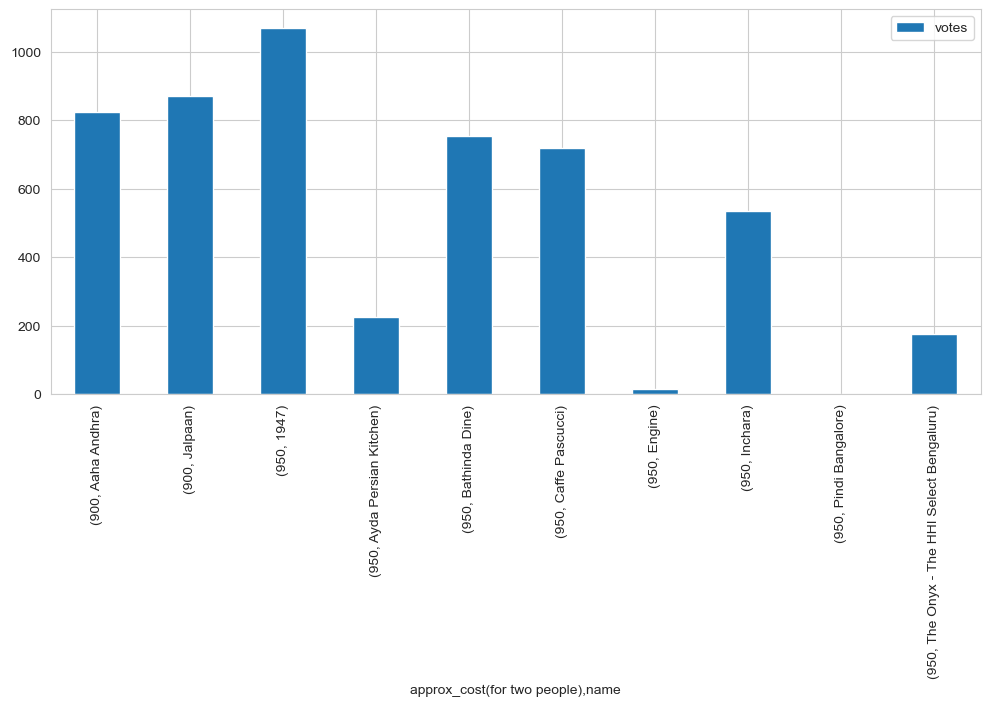

In [6]:
df1 = data.copy().sort_values(by='approx_cost(for two people)',ascending= False).drop_duplicates('name').head(10)
df1.groupby(['approx_cost(for two people)','name']).mean().plot.bar();

### Deleting Unnnecessary Columns

In [7]:
df=data.drop(['url','dish_liked','phone'],axis=1)  # by default it takes axis 0

In [8]:
df.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes      location            rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari        Casual Dining   
1          Yes         No  4.1/5    787  Banashankari        Casual Dining   
2          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   
3           No         No  3.7/5     88  Banashankari          Quick Bites   
4           No         No  3.8/5    166  Basavanagudi        Casual Dining   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [9]:
df.shape

(51717, 14)

In [10]:
df.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

The cost goes from 1 bucks and goes all the way upto 950 and the average of average cost is 400 bucks.

The reviews are none in some of the cases however the maximum number of reviews is 16832 

### Removing the Duplicates

In [11]:
df[df.duplicated()].name

596                            My Tea House
7599                       Nawab Di Biryani
9464                                Vyanjan
9466                                Carrots
9467                              Eatsomnia
9468                             Rolls & Co
9469                                   Fogg
9470                    The Paratha Stories
9471                             Mycakeshop
9549                    Bisimillah Biriyani
9638        Bisimillah Biriyani's & Kebab's
12287                           China South
12288                             Chination
12289                           Desi Streat
12290                           Durga Sagar
12291                        Happy Fillings
12292                Marathi Biriyani House
12294                              Kareem's
12296                                Aubree
12303                    Mudaliar's Kitchen
12314                                Ta'aam
12322                          Promac Foods
12347                        Asc

In [12]:
df.duplicated().sum()

43

In [13]:
df.drop_duplicates(inplace=True) 
df.shape 

(51674, 14)

In [14]:
df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

### Checking for Null values in terms of percentage

In [15]:
print("Checking the Null or na percentage")
((df.isnull() | df.isna()).sum()*100 / df.index.size)

Checking the Null or na percentage


address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.030770
votes                           0.000000
location                        0.040639
rest_type                       0.439292
cuisines                        0.087084
approx_cost(for two people)     0.667647
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

### Remove the NaN values from the dataset

In [16]:
df.dropna(how='any',inplace=True)  #
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [17]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Renaming the column names

In [18]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [19]:
df['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [20]:
df['cost'] 

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: cost, Length: 43499, dtype: object

### Following operations on cost column
- As cost is expected to be a float value we are changing the cost to string first
- Secondly, Using lambda function to replace ',' from cost and making it purely inergral value
- Later, Changing the cost to Float

In [21]:
df['cost'] = df['cost'].astype(str) 
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.')) 
df['cost'] = df['cost'].astype(float) 
df['cost']

0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
51709    800.0
51711    800.0
51712      1.5
51715      2.5
51716      1.5
Name: cost, Length: 43499, dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [23]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
type(df['rate'][0])

str

### Operations on rate column
- Excluding all those rows with rate = NEW, (tehy are newly joined to zomato and wont contibute much for our prediction) and ``'-'`` (as it is irrelevant and we cannot get any perception of such columns), since we purely want an integral value for rate
- Replacing '/5' from Rates with nothing(means removing /5 ) if and only if the data type of x is string, if by default it was numeric, then consider them 
- converting the data with to float


In [25]:
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-']
df.rate = df.rate.apply(lambda x: x.replace('/5', '') if type(x) == np.str else x)
df['rate'].head()

C:\Users\18125\AppData\Local\Temp\ipykernel_42032\643440751.py:3: DeprecationWarning:

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: object

###  Modifications in the column names 
- Capitalizing the names of the restaurants
- Replacing Yes and No to boolean data values True and False in  rows book_table and online_order

In [26]:
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)
df.head() # looking at the dataset after transformation

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

   online_order  book_table rate  votes      location            rest_type  \
0          True        True  4.1    775  Banashankari        Casual Dining   
1          True       False  4.1    787  Banashankari        Casual Dining   
2          True       False  3.8    918  Banashankari  Cafe, Casual Dining   
3         False       False  3.7     88  Banashankari          Quick Bites   
4         False       False  3.8    166  Basavanagudi        Casual Dining   

                         cuisines   cost  \
0  North Indian, Mughlai, Chinese  800.0   
1     Chinese, North Indian, Thai  800.0   
2          Cafe, Mexican, Italian  800.0   
3      South Indian, North Indian  300.0   
4        North Indian, Rajasthani  600.0   

                                        reviews_list menu_item    type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []  Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []  Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []  Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []  Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []  Buffet   

           city  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

###  Checking the range of costs values by taking its unique values

In [27]:
df.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

- For the categorical series like address, name, online_order etc we get the numeric representation by identifying distinct values by encodign it using the  factorize() fucntion

In [28]:
df.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

   online_order  book_table rate  votes      location            rest_type  \
0          True        True  4.1    775  Banashankari        Casual Dining   
1          True       False  4.1    787  Banashankari        Casual Dining   
2          True       False  3.8    918  Banashankari  Cafe, Casual Dining   
3         False       False  3.7     88  Banashankari          Quick Bites   
4         False       False  3.8    166  Basavanagudi        Casual Dining   

                         cuisines   cost  \
0  North Indian, Mughlai, Chinese  800.0   
1     Chinese, North Indian, Thai  800.0   
2          Cafe, Mexican, Italian  800.0   
3      South Indian, North Indian  300.0   
4        North Indian, Rajasthani  600.0   

                                        reviews_list menu_item    type  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []  Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []  Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []  Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []  Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []  Buffet   

           city  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

In [29]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df  # returning the dataset

df_en = Encode(df.copy())
df_en.head()

address  name  online_order  book_table rate  votes  location  rest_type  \
0        0     0             0           0  4.1    775         0          0   
1        1     1             0           1  4.1    787         0          0   
2        2     2             0           1  3.8    918         0          1   
3        3     3             1           1  3.7     88         0          2   
4        4     4             1           1  3.8    166         1          0   

   cuisines   cost  reviews_list  menu_item  type  city  
0         0  800.0             0          0     0     0  
1         1  800.0             1          0     0     0  
2         2  800.0             2          0     0     0  
3         3  300.0             3          0     0     0  
4         4  600.0             4          0     0     0

In [30]:
df_en.tail()

address  name  online_order  book_table  rate  votes  location  \
51709     3137  2699             1           1  3.7      34        25   
51711     8791  1716             1           1  2.5      81        25   
51712     8725  6532             1           1  3.6      27        25   
51715     8786  6568             1           0  4.3     236        56   
51716     3444  6569             1           1  3.4      13        56   

       rest_type  cuisines   cost  reviews_list  menu_item  type  city  
51709         28       204  800.0          4028          0     6    29  
51711         28       761  800.0         21082          0     6    29  
51712         17       240    1.5         20956          0     6    29  
51715         17       237    2.5         21054          0     6    29  
51716         33      1870    1.5         21055          0     6    29

### Plotting correlation matrix for different variables

<AxesSubplot:>

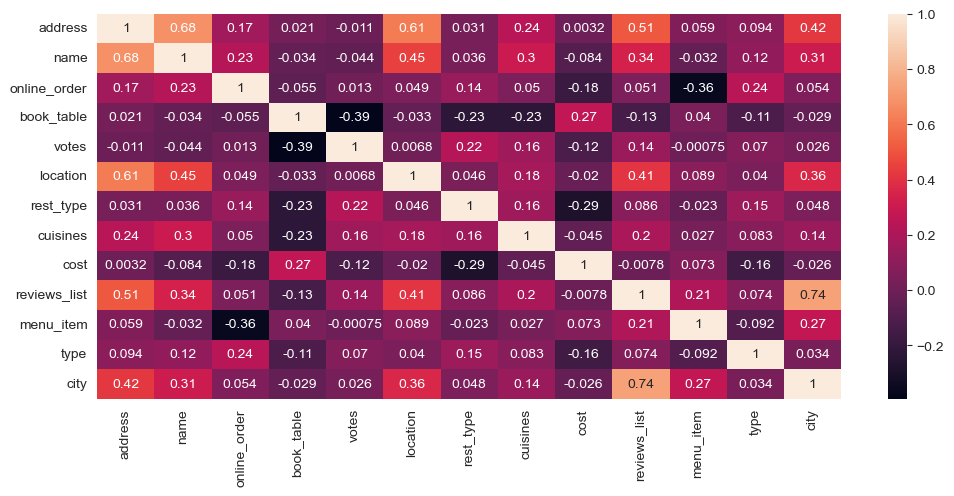

In [31]:
sns.heatmap(df_en.corr(), annot=True)

- The correlation between name and address is 0.62, the highest which doenst help in prediction

In [32]:
df_en['menu_item'].unique()

array([   0,    1,    2, ..., 8240, 8241, 8242], dtype=int64)

In [33]:
df_en['location'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91], dtype=int64)

In [34]:
df_en['cuisines'].unique()

array([   0,    1,    2, ..., 2364, 2365, 2366], dtype=int64)

In [35]:
df_en['rest_type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86], dtype=int64)

### Rating Distribution

C:\Users\18125\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='rate', ylabel='Density'>

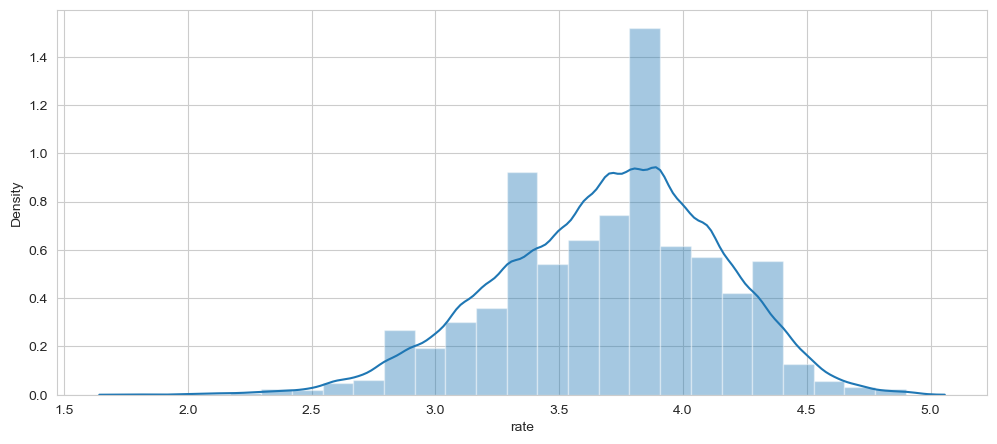

In [36]:
sns.distplot(df['rate'], bins = 25)

- Most of the Hotels have ratings in between 3.7-4.0

In [37]:
print(df['rest_type'].nunique())
df['rest_type'].unique()

87


array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  bool   
 3   book_table    41237 non-null  bool   
 4   rate          41237 non-null  object 
 5   votes         41237 non-null  int64  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost          41237 non-null  float64
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 4.2+ MB


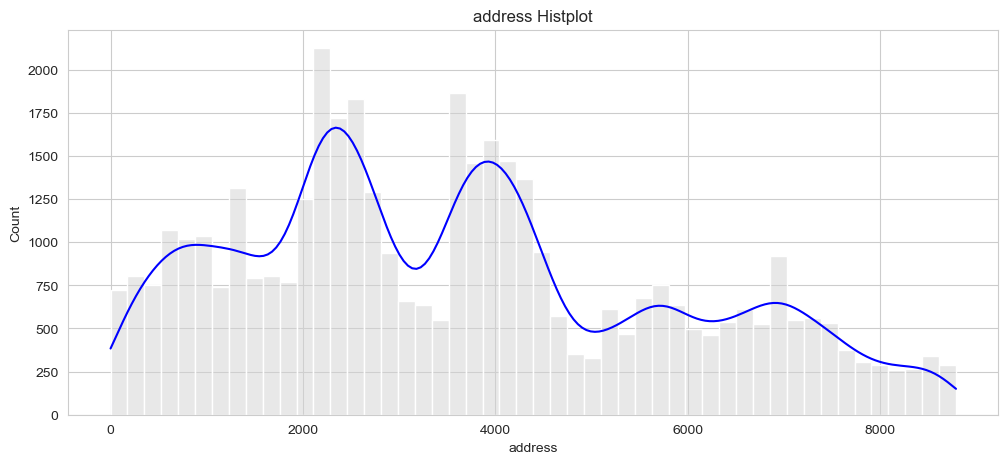

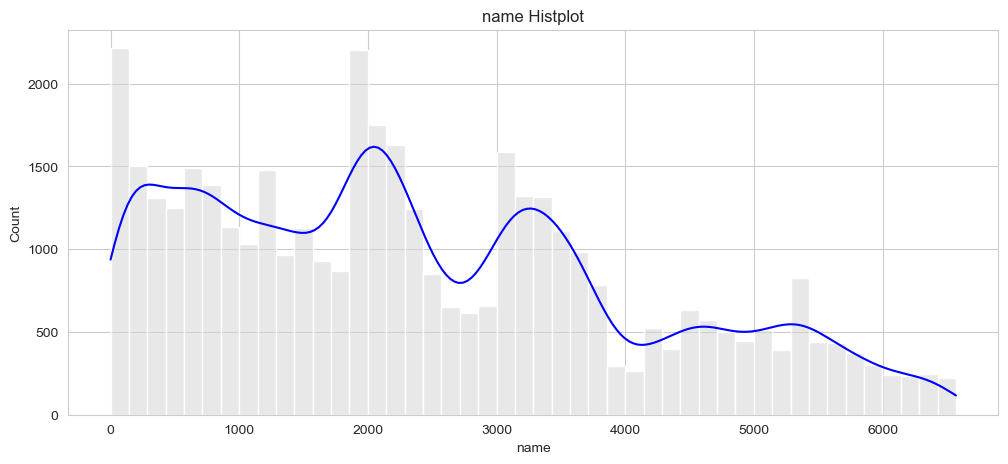

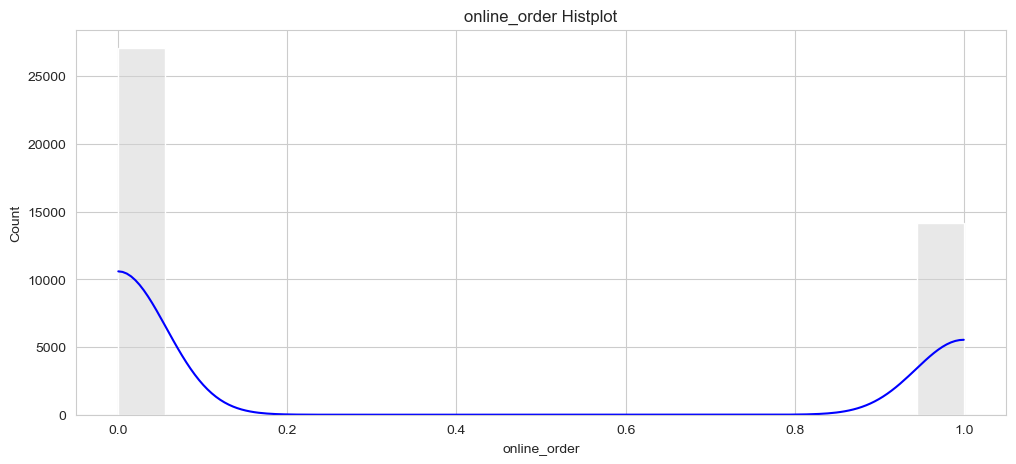

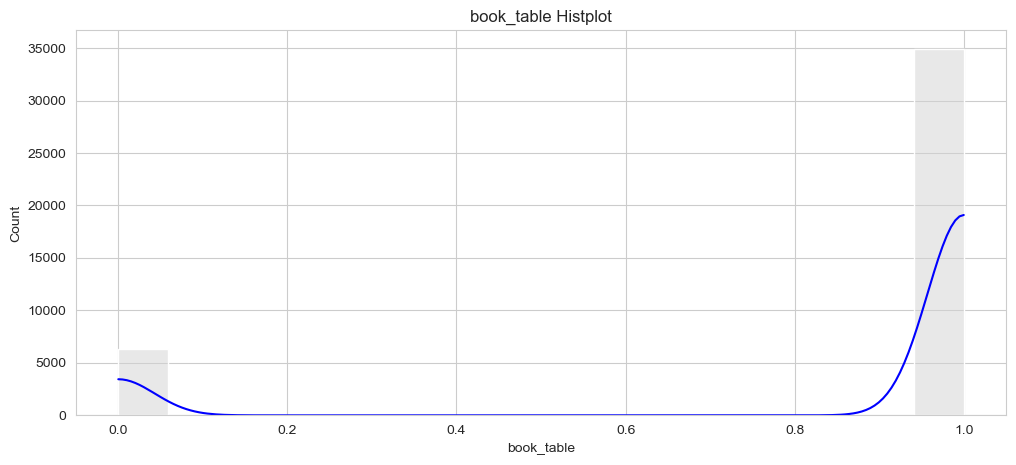

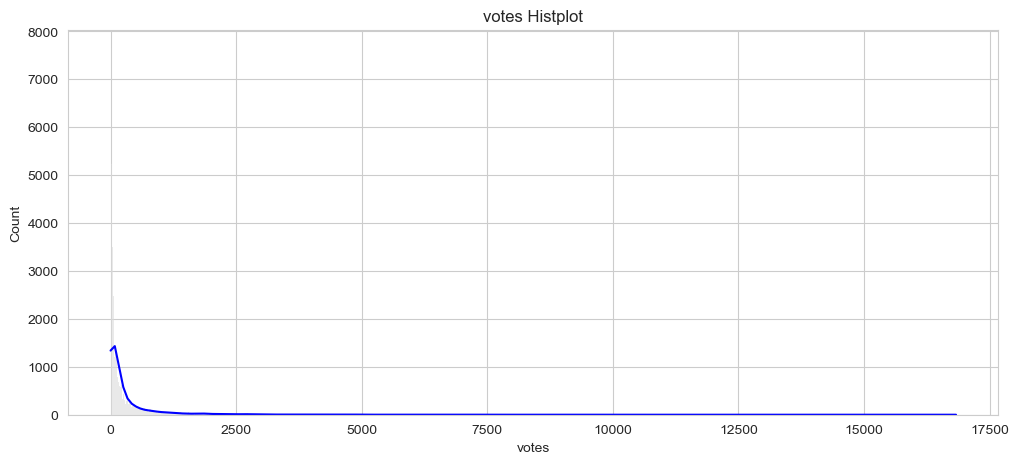

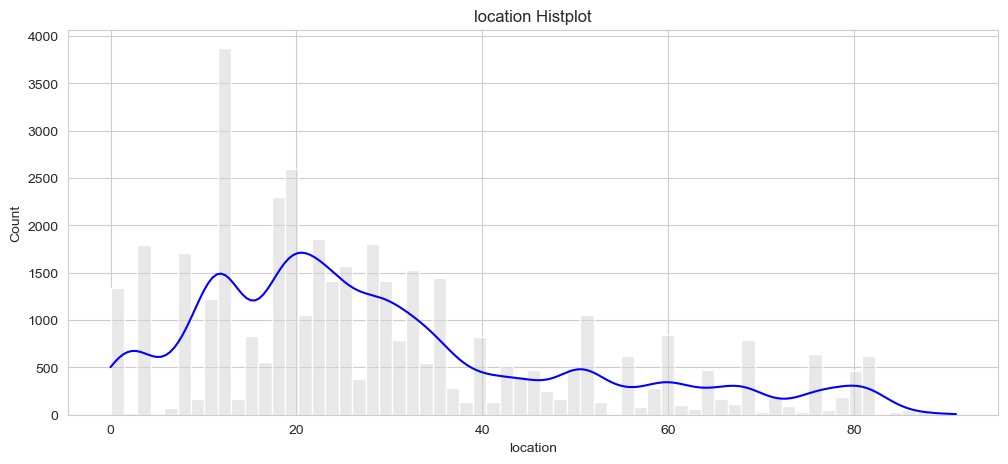

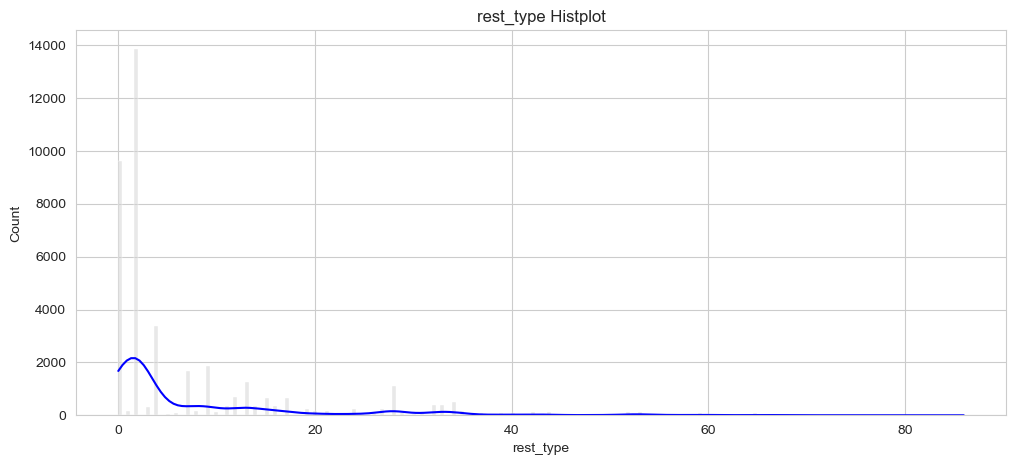

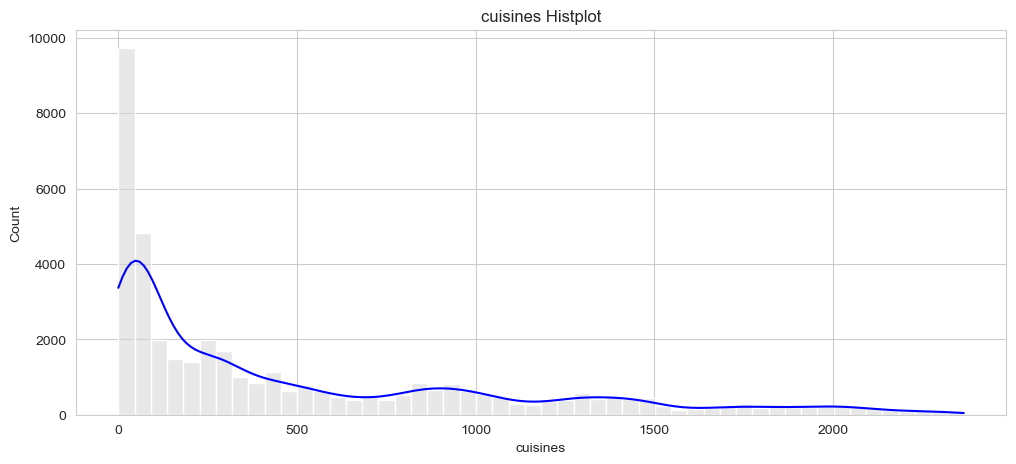

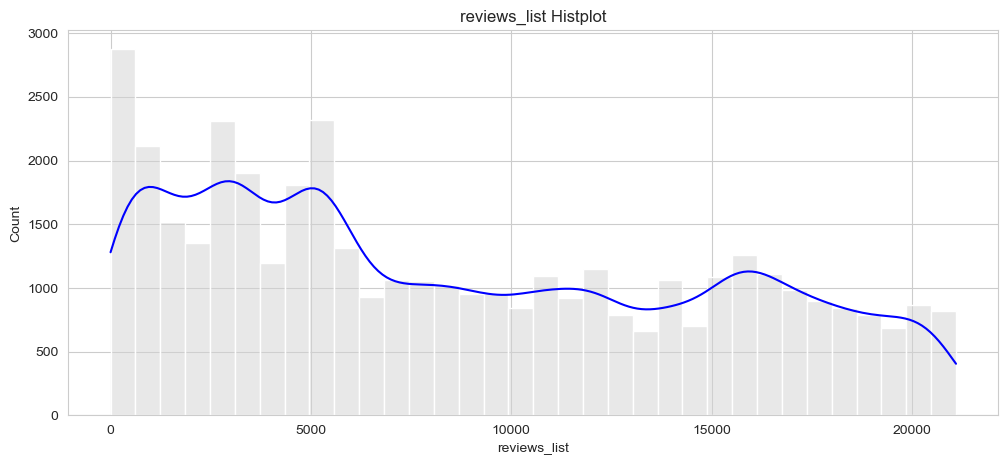

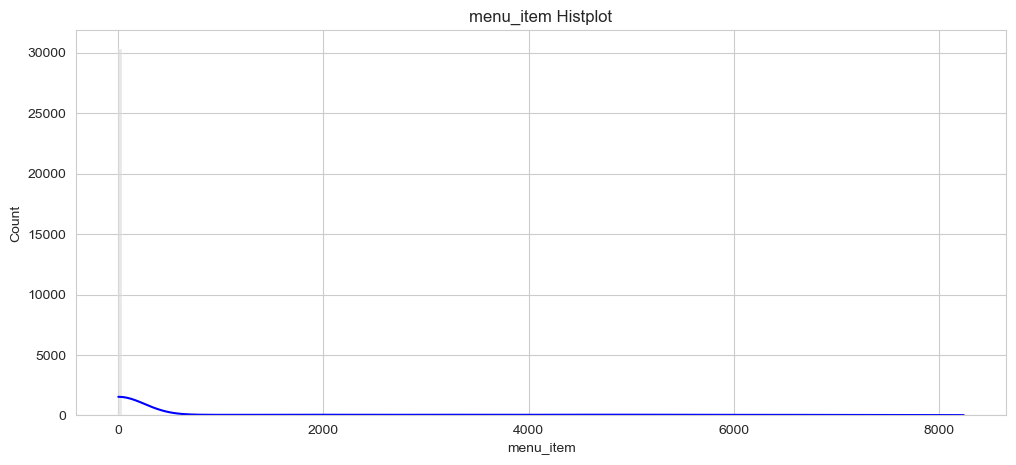

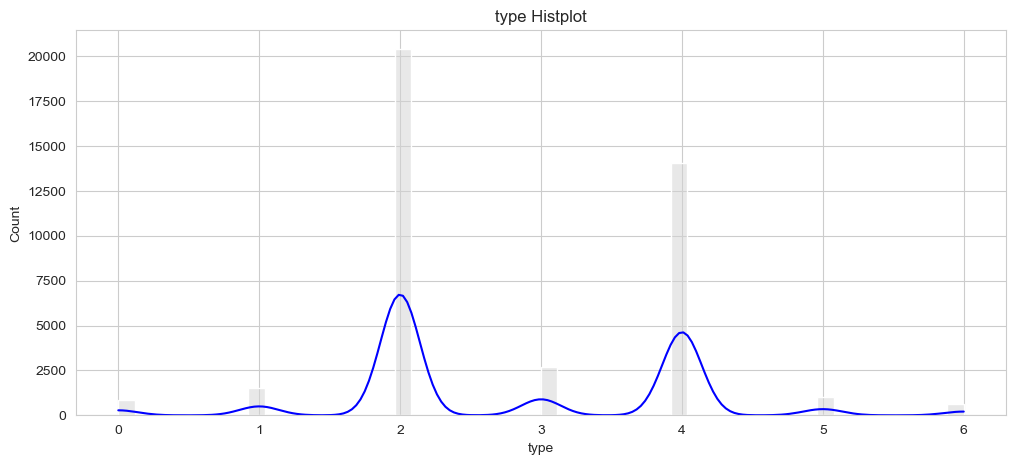

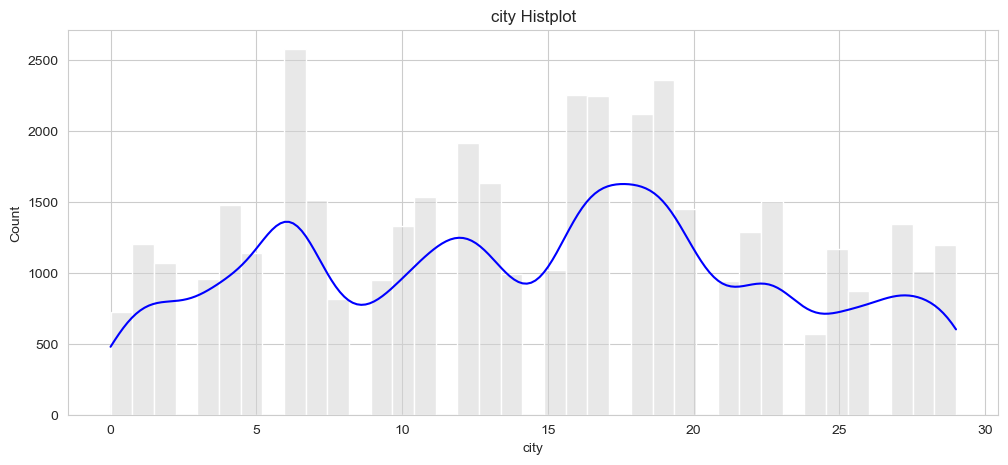

In [39]:
for i in df_en.select_dtypes(include=['int64']):
    ax= sns.histplot(df_en.select_dtypes(include=['int64'])[i],  
             kde=True, color='lightgray')
    ax.lines[0].set_color('blue')
    plt.title(i+" "+'Histplot')
    plt.show();

Analysis from the above charts:-

More restaurants in Bangalore are doing the home delivery than the takeaways. Restaurants are focussing more on delivering the convenience to the customers as opposed to having the people walk up to the restaurants to pick up their order.

Veg Only restaurants are very less in Bengaluru, India,

Dine-in places are less which relates with our first point that states there are more restaurants that like to deliver.

Dinner Reviews are less than Delivery reviews. The dinner reviews are bound to be less just by the comparison of the deliveries being done in the area.

Average Cost is within the Rs 300-400 range.

### Plotting for the Top 25 Restaurants in the Bengaluru

Text(0.5, 0, 'Number of Outlets')

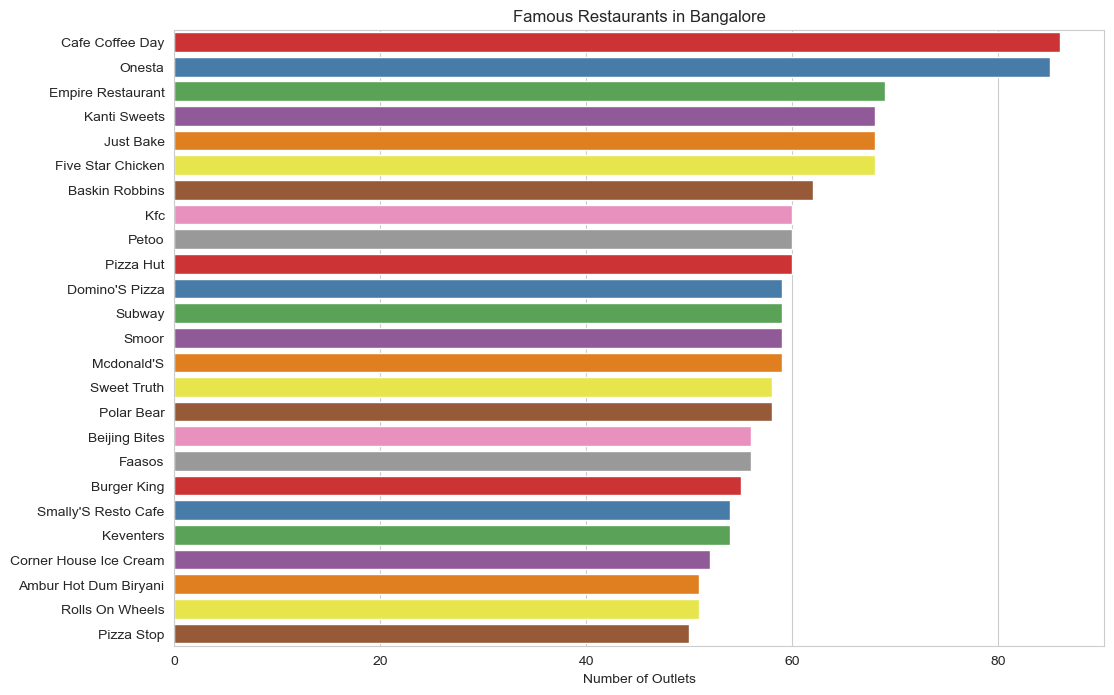

In [40]:
plt.figure(figsize=(12,8))
val = df['name'].value_counts()[:25] 
sns.barplot(x=val, y=val.index, palette = "Set1")
plt.title("Famous Restaurants in Bangalore")
plt.xlabel("Number of Outlets")

#### Plot for restaurants delivering Online or not

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Restaurants delivering online or Not')

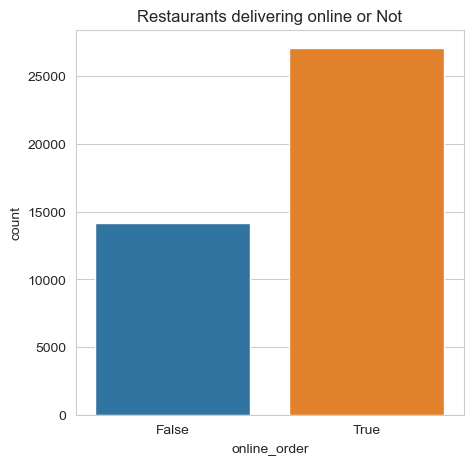

In [41]:
sns.countplot(df['online_order'])
plt.gcf().set_size_inches(5,5)
plt.title('Restaurants delivering online or Not')

#### Plot for restaurants allowing table booking or not

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Restaurants allowing table booking or not')

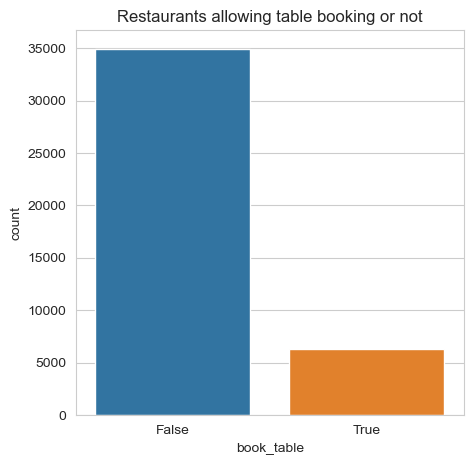

In [42]:
sns.countplot(df['book_table'])
plt.gcf().set_size_inches(5,5)
plt.title('Restaurants allowing table booking or not')

#### Table booking Rate vs Normal Rate

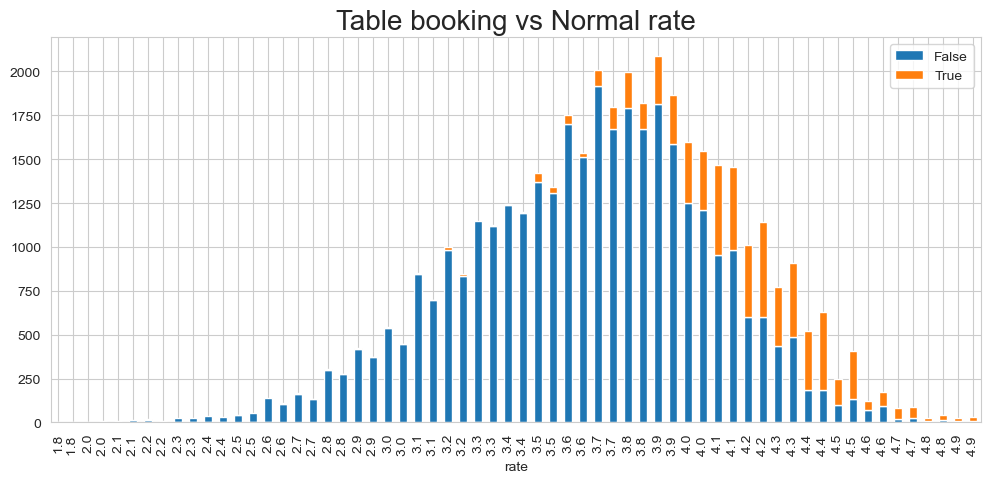

In [43]:
Y = pd.crosstab(df['rate'], df['book_table']).plot(kind = 'bar', stacked = True)
plt.title('Table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

#### Location

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



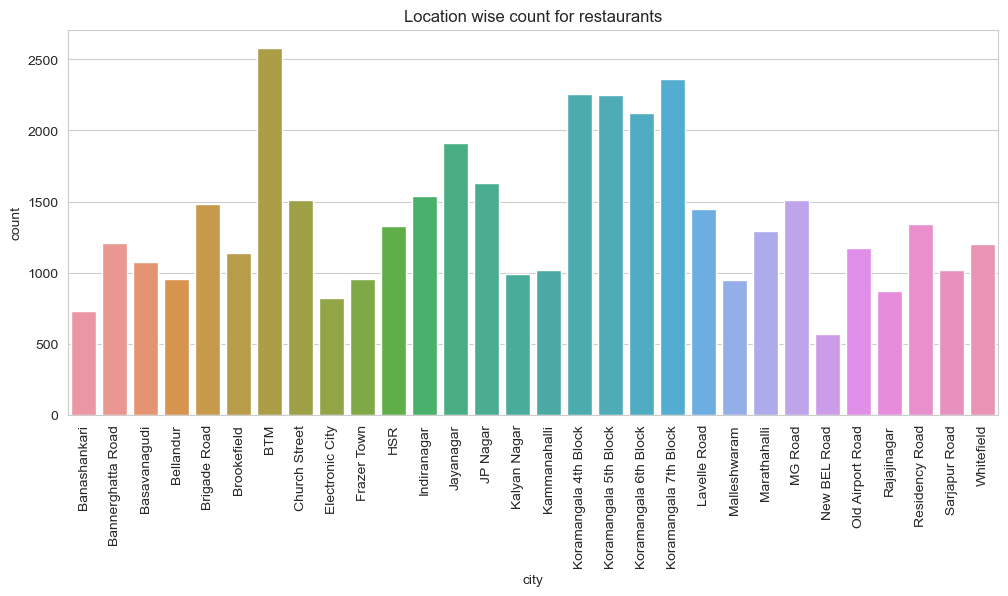

In [44]:
sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90)
plt.title('Location wise count for restaurants')
plt.show()

#### Location and Rating

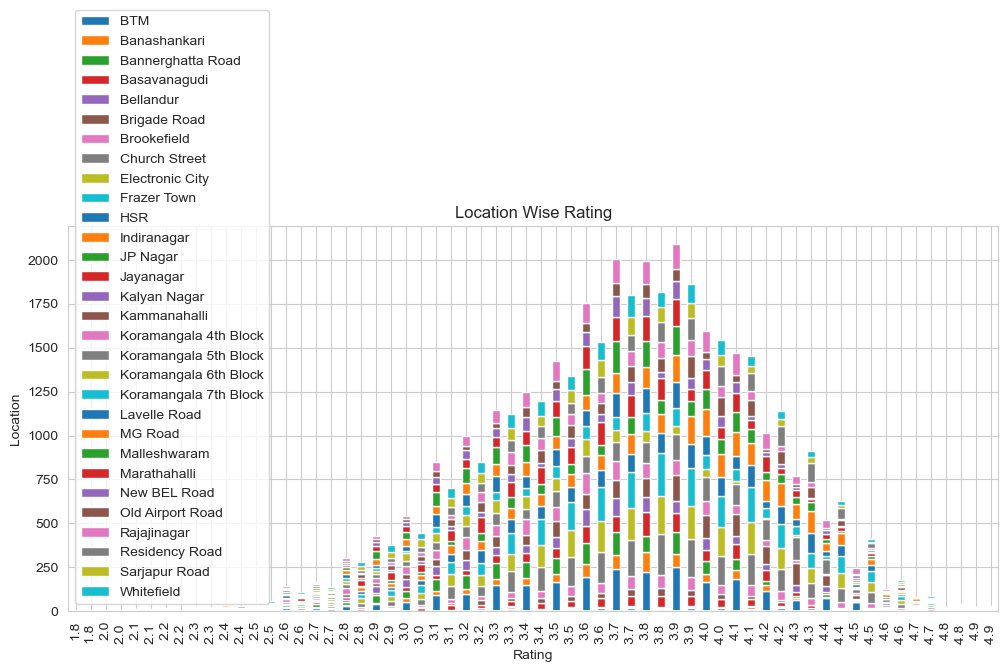

In [45]:
pd.crosstab(df['rate'],df['city']).plot(kind='bar',stacked=True);
plt.title('Location Wise Rating')
plt.ylabel('Location')
plt.xlabel('Rating')
plt.legend();

#### Restaurant Type

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



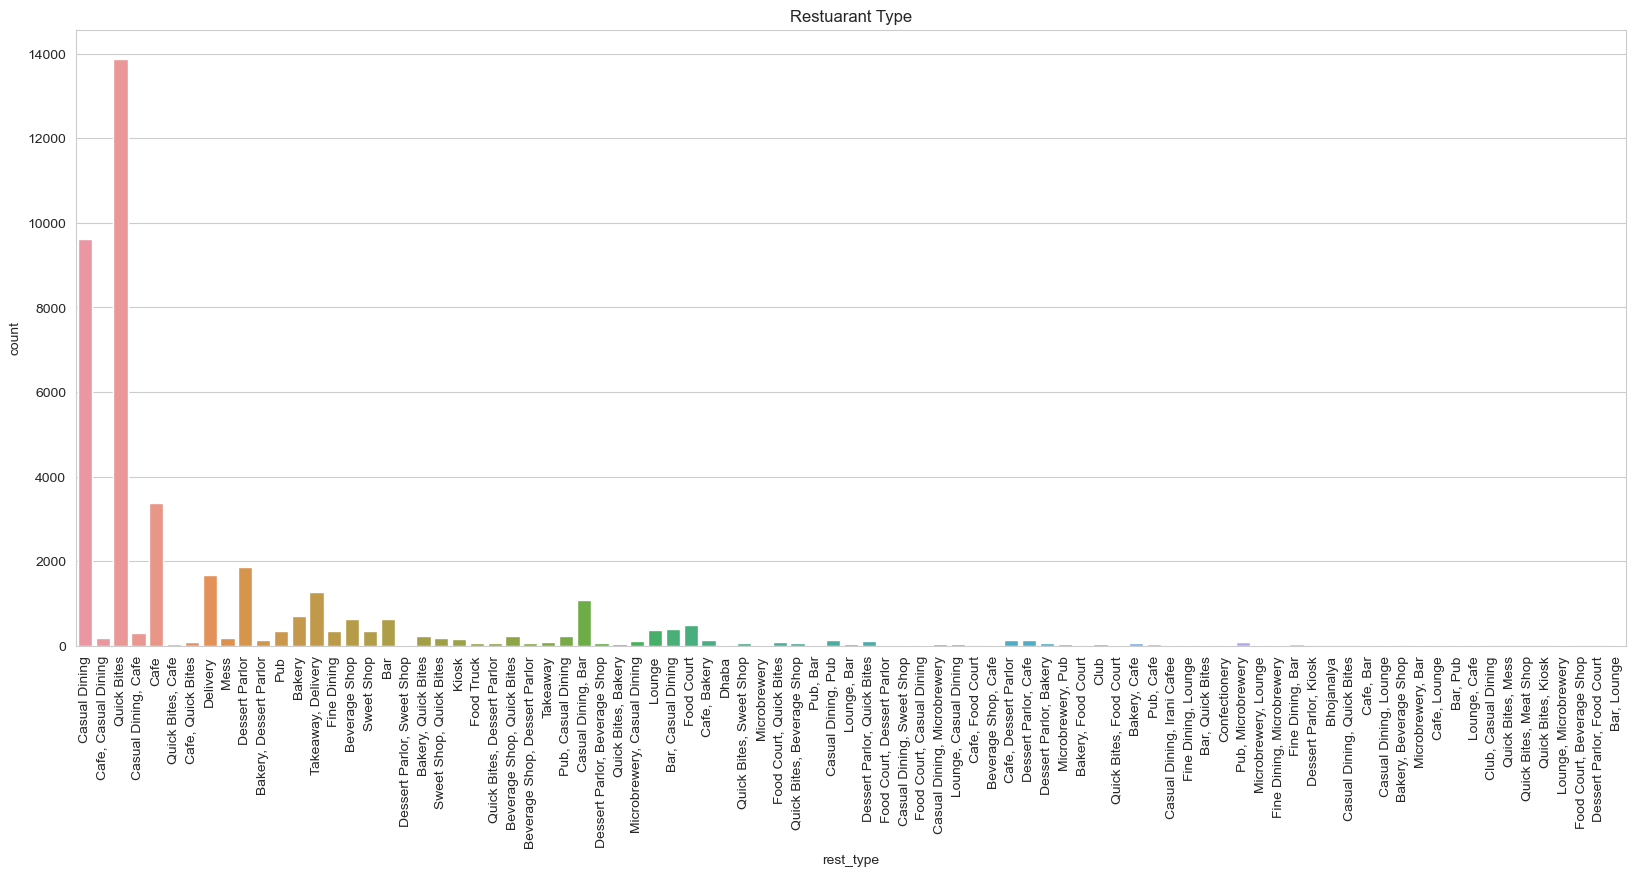

In [46]:
plt.figure(figsize=(20,8))
sns.countplot(df['rest_type']).set_xticklabels(sns.countplot(df['rest_type']).get_xticklabels(), rotation=90)
plt.title('Restuarant Type')
plt.show()

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



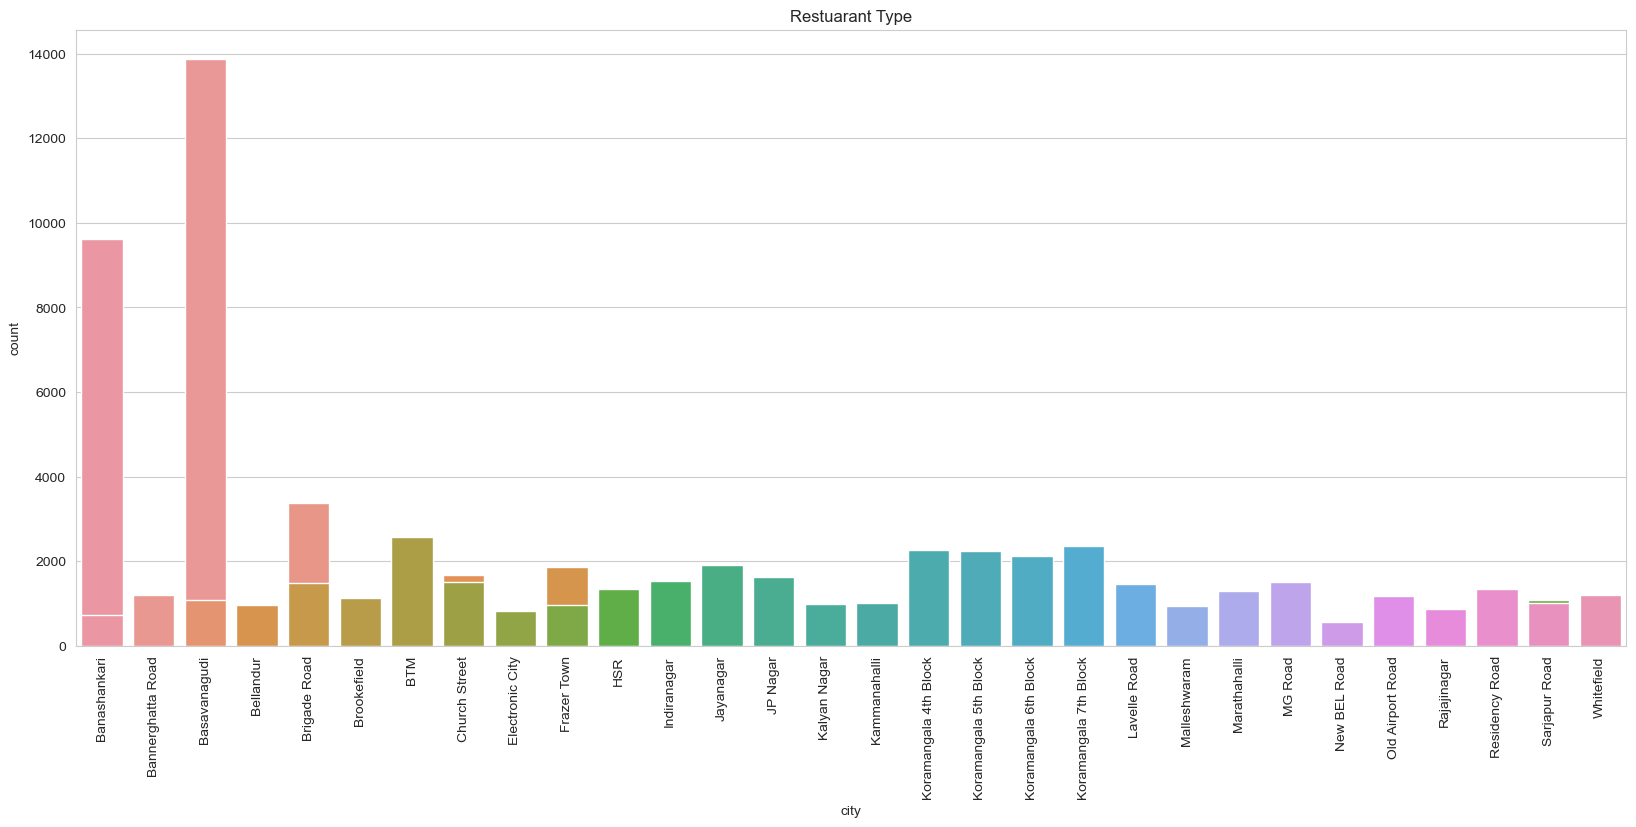

In [47]:
plt.figure(figsize=(20,8))
sns.countplot(df['rest_type']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90)
plt.title('Restuarant Type')
plt.show()

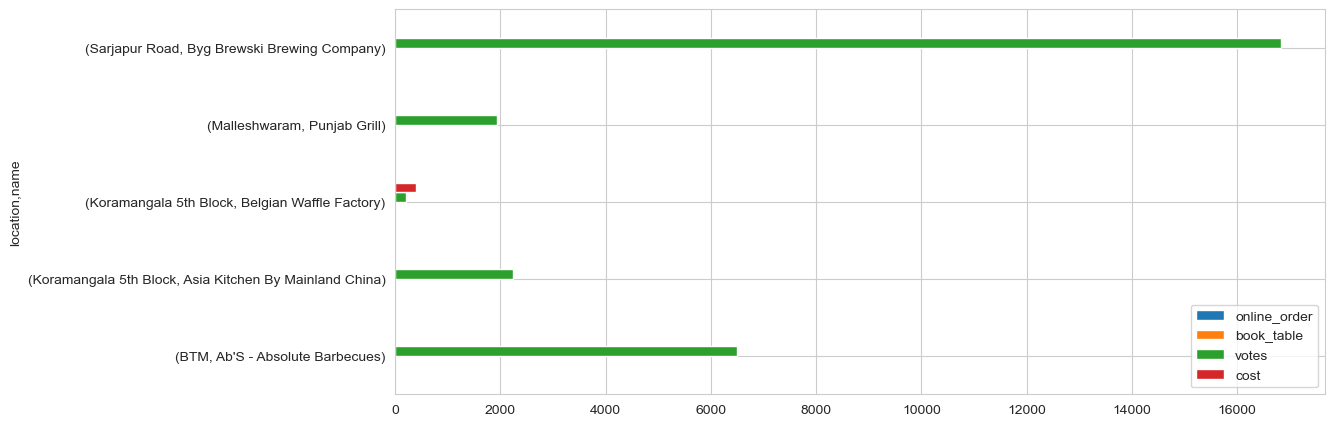

In [48]:
df2 = df.copy().sort_values(by='rate',ascending= False).drop_duplicates('name').head(5)
df2.groupby(['location','name']).sum().plot.barh();

#### Gaussian Rest type and Rating

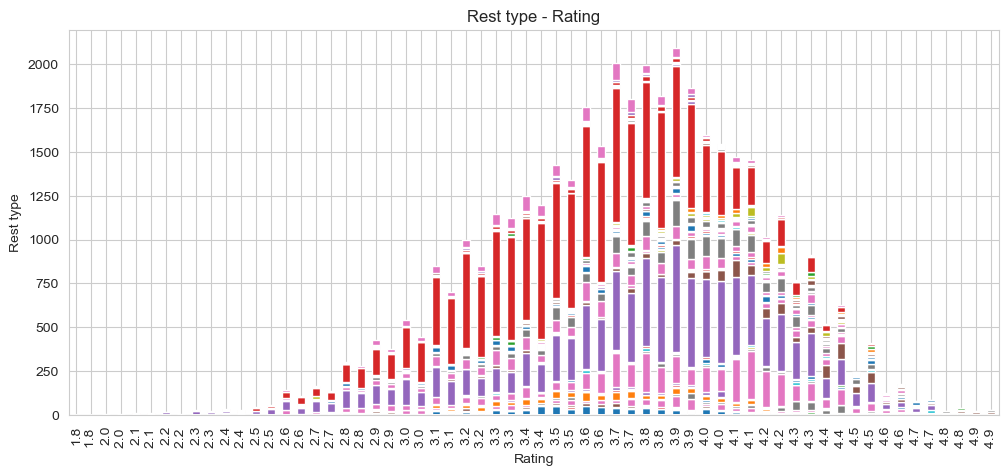

In [49]:
pd.crosstab(df['rate'],df['rest_type']).plot(kind='bar',stacked=True);
plt.title('Rest type - Rating')
plt.ylabel('Rest type')
plt.xlabel('Rating')
plt.legend().remove();

#### Types of Services

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Type of Service')

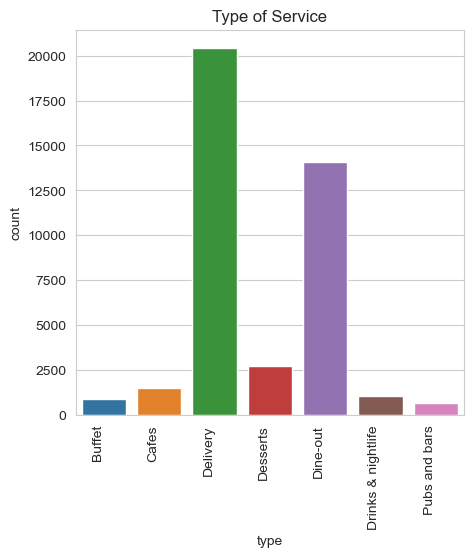

In [50]:
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Type of Service')

#### Type and Rating

Text(0.5, 0, 'Rating')

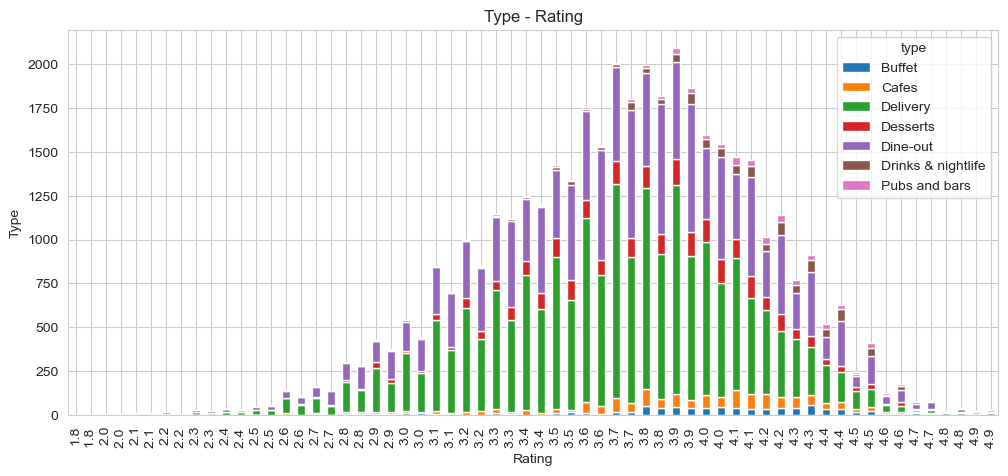

In [51]:
pd.crosstab(df['rate'],df['type']).plot(kind='bar',stacked=True);
plt.title('Type - Rating')
plt.ylabel('Type')
plt.xlabel('Rating')

#### Cost of Restuarant

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Cost of Restuarant')

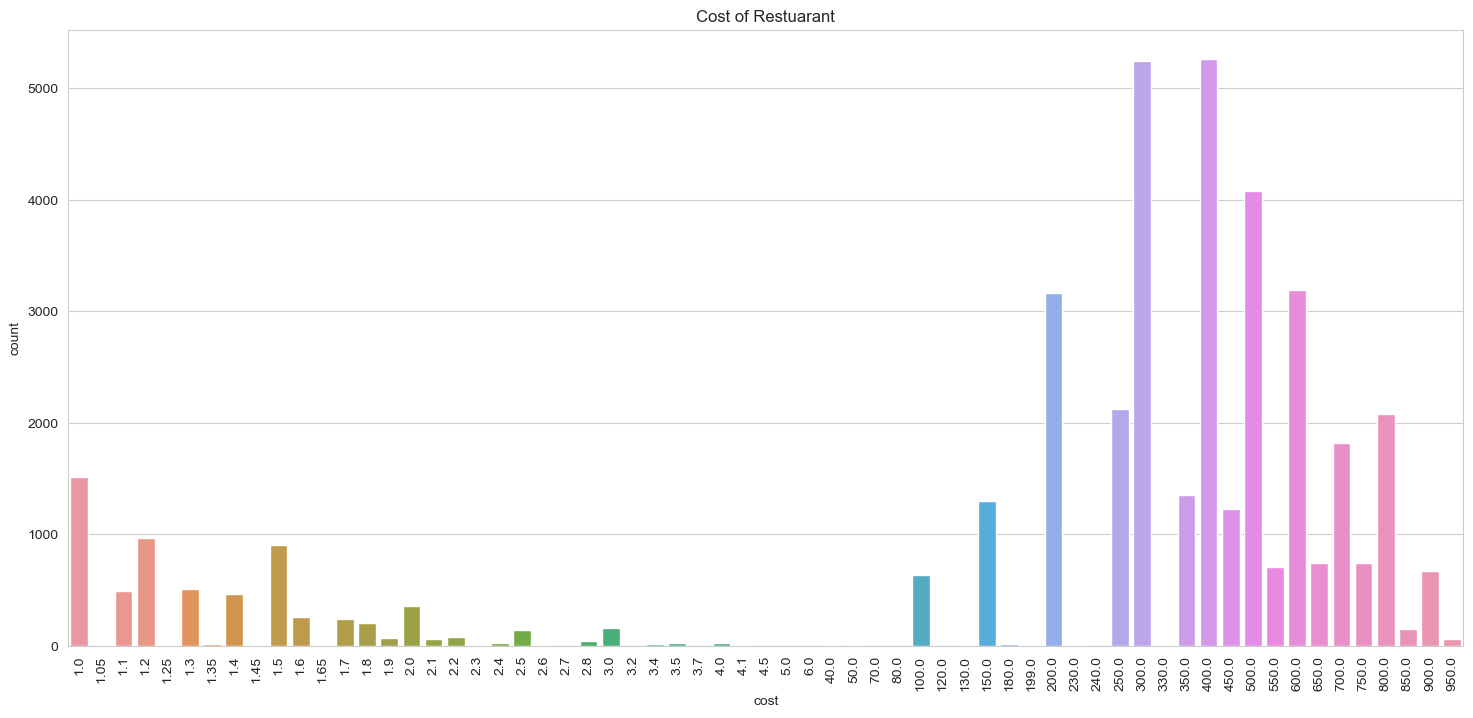

In [52]:
sns.countplot(df['cost']).set_xticklabels(sns.countplot(df['cost']).get_xticklabels(), rotation=90)
plt.gcf().set_size_inches(18,8)
plt.title('Cost of Restuarant')

#### No. of Restaurants in a Location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

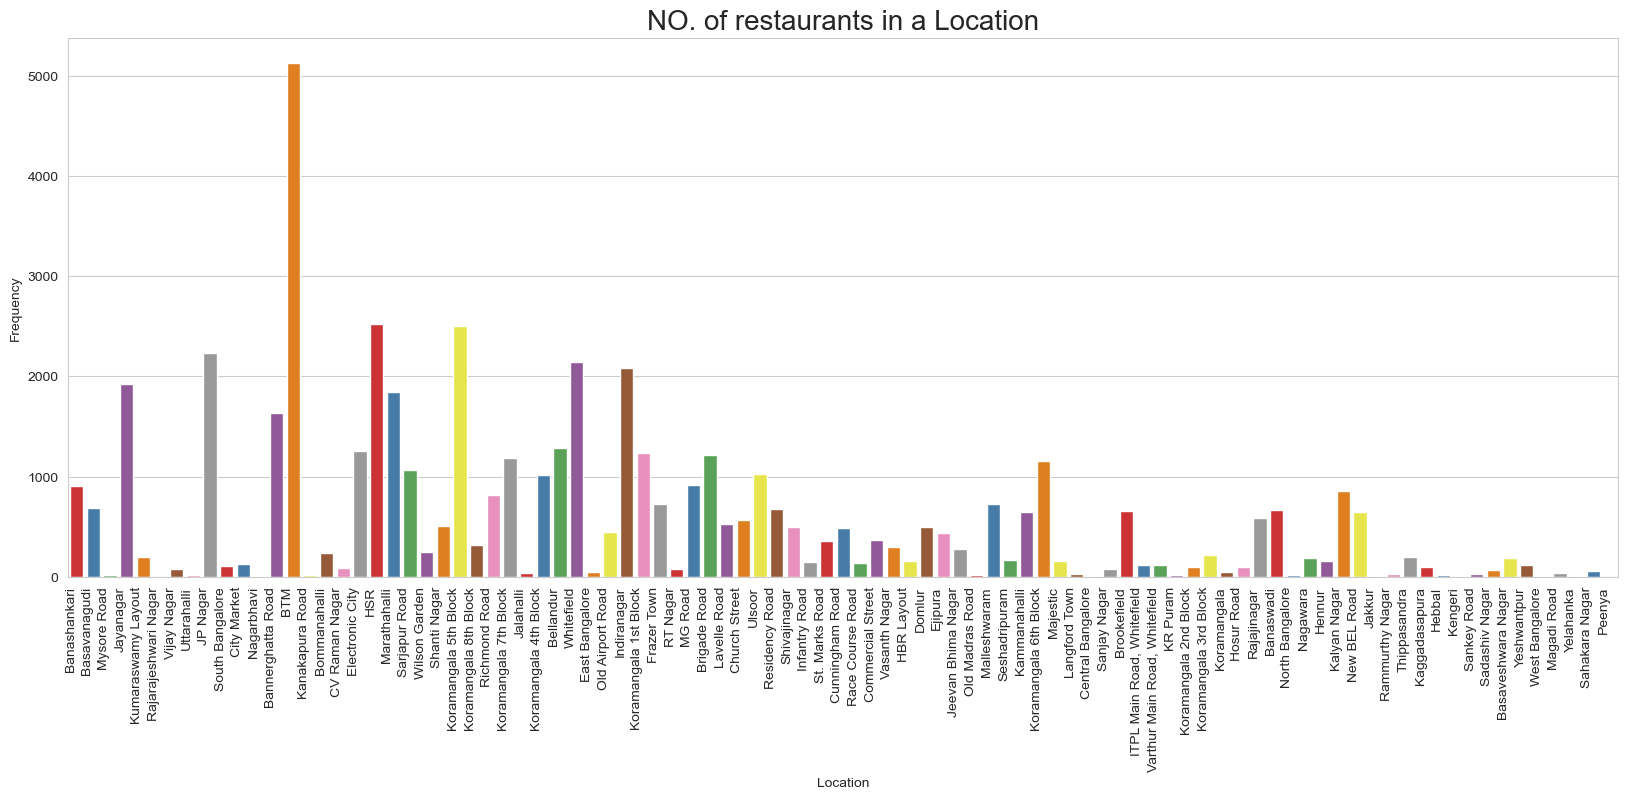

In [53]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=data, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency")
plt.xlabel("Location")
plt.title('NO. of restaurants in a Location',size = 20)

#### Restaurant type

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\18125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Restuarant Type')

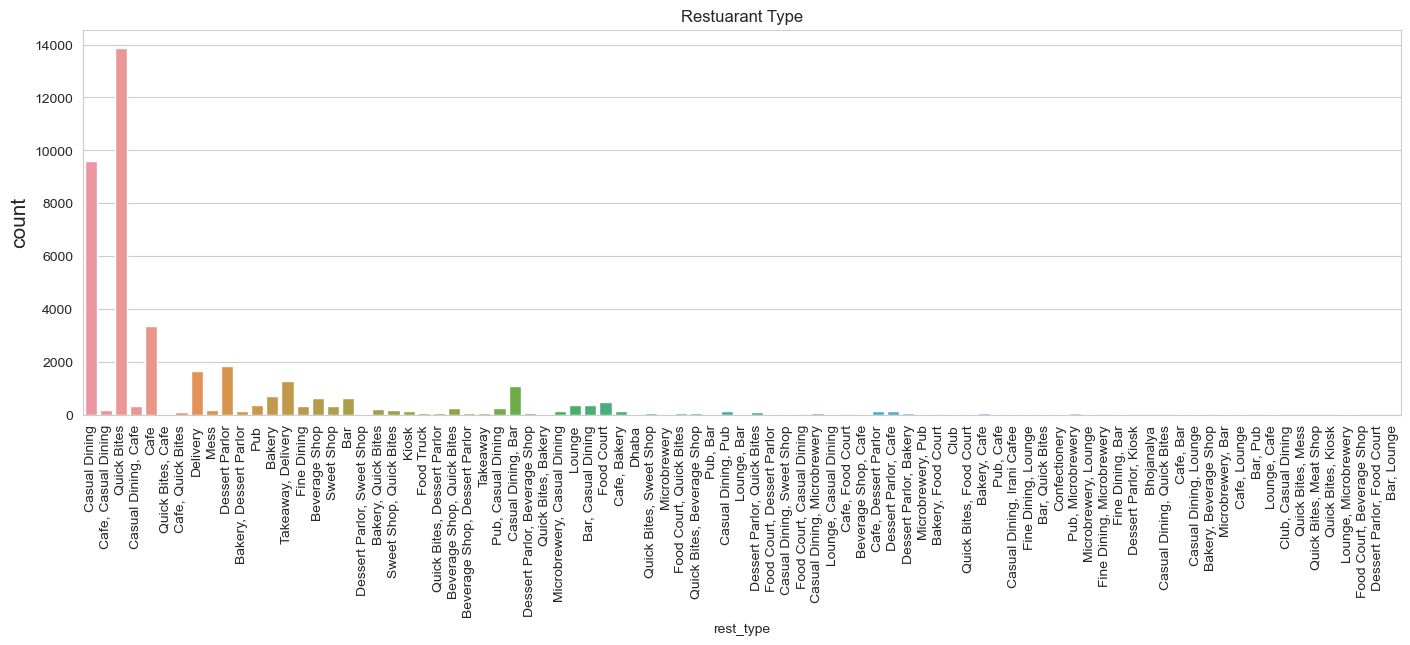

In [54]:
fig = plt.figure(figsize=(17,5))
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type")
plt.title('Restaurant types')
sns.countplot(df['rest_type']).set_xticklabels(sns.countplot(df['rest_type']).get_xticklabels(), rotation=90)
plt.title('Restuarant Type')

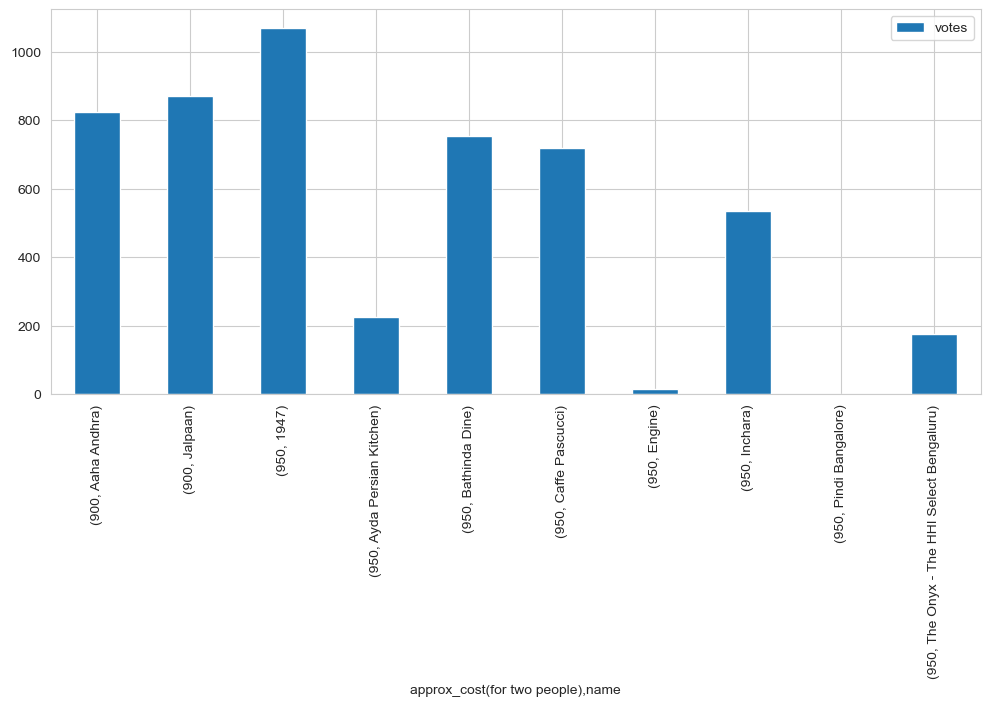

In [55]:
df1 = data.copy().sort_values(by='approx_cost(for two people)',ascending= False).drop_duplicates('name').head(10)
df1.groupby(['approx_cost(for two people)','name']).mean().plot.bar();

In [56]:
#Restaurant wise average cost in Bengaluru Location
fig = px.bar(df1, x='name',y='approx_cost(for two people)', text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

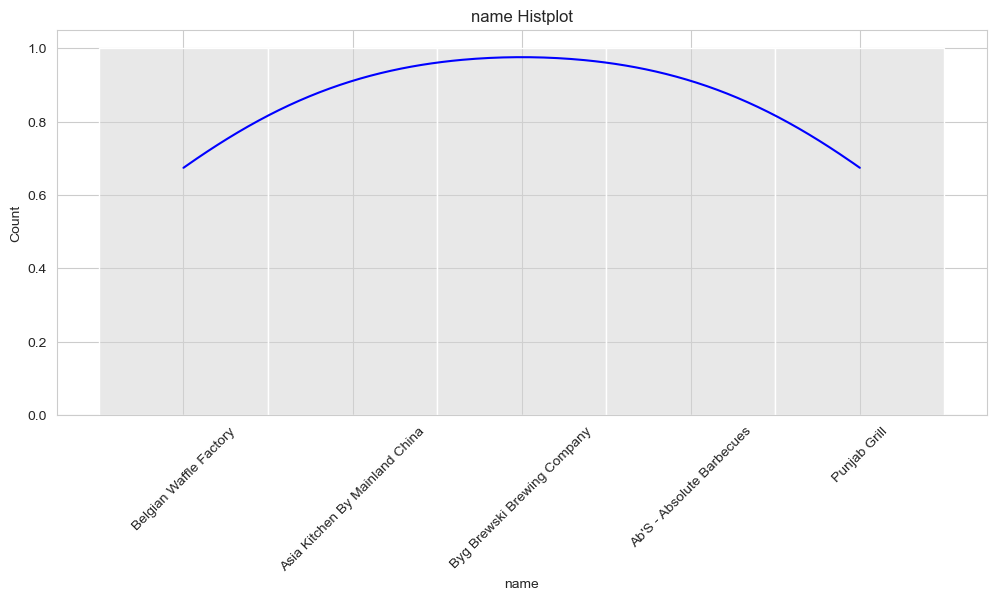

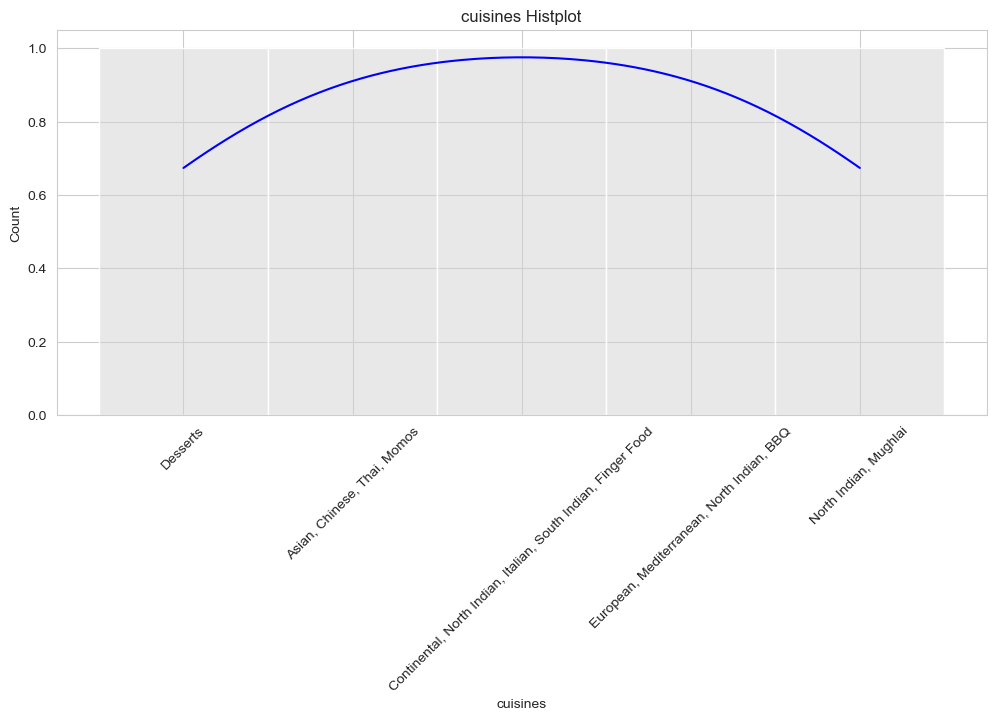

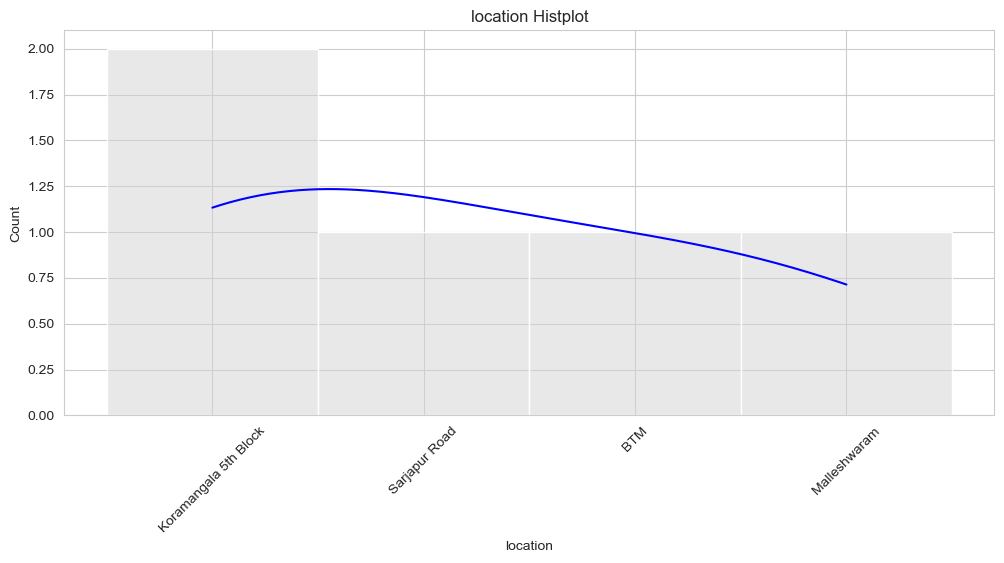

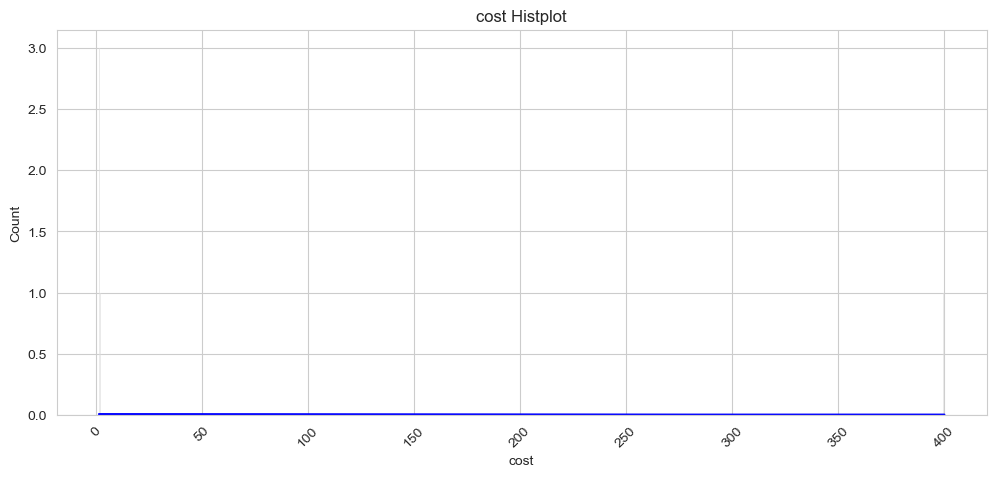

In [57]:
for i in df2[['name', 'cuisines', 'location', 'cost']]:    
    ax= sns.histplot(df2[['name', 'cuisines', 'location' ,'cost']][i],  
             kde=True, color='lightgray')
    ax.lines[0].set_color('blue')
    plt.title(i+" "+'Histplot')
    plt.xticks(rotation = 45)
    plt.show();

In [58]:
for i in df[['rate','votes', 'cost']]:
    fig = px.histogram(df[['rate','votes', 'cost']], 
                       x=i, 
                       template='simple_white')
    fig.show()

In case of zero rating, it could either be the customer not giving any rating or he may have actually given the zero rating.

In [59]:
df.groupby(['location','cuisines']).sum()

online_order  \
location    cuisines                                                           
BTM         Andhra                                                        10   
            Andhra, Biryani                                               16   
            Andhra, Biryani, Chinese, North Indian, Seafood...            10   
            Andhra, Biryani, North Indian                                  7   
            Andhra, Biryani, North Indian, Chinese                        15   
...                                                                      ...   
Yeshwantpur South Indian, Biryani, North Indian, Chinese                   2   
            South Indian, North Indian                                     2   
            South Indian, North Indian, Chinese                            6   
            Street Food                                                    0   
            Thai, Chinese, Momos                                           1   

                                                                book_table  \
location    cuisines                                                         
BTM         Andhra                                                       0   
            Andhra, Biryani                                              0   
            Andhra, Biryani, Chinese, North Indian, Seafood...           0   
            Andhra, Biryani, North Indian                                0   
            Andhra, Biryani, North Indian, Chinese                       0   
...                                                                    ...   
Yeshwantpur South Indian, Biryani, North Indian, Chinese                 0   
            South Indian, North Indian                                   0   
            South Indian, North Indian, Chinese                          0   
            Street Food                                                  0   
            Thai, Chinese, Momos                                         0   

                                                                votes    cost  
location    cuisines                                                           
BTM         Andhra                                                365  5100.0  
            Andhra, Biryani                                      1929  5500.0  
            Andhra, Biryani, Chinese, North Indian, Seafood...   7378  6000.0  
            Andhra, Biryani, North Indian                         162  4200.0  
            Andhra, Biryani, North Indian, Chinese               2805  7750.0  
...                                                               ...     ...  
Yeshwantpur South Indian, Biryani, North Indian, Chinese          158   900.0  
            South Indian, North Indian                            444   800.0  
            South Indian, North Indian, Chinese                   682  3050.0  
            Street Food                                             8   200.0  
            Thai, Chinese, Momos                                   23   600.0  

[6494 rows x 4 columns]

In [60]:
fig = px.bar(df.groupby(['cuisines']).sum().head(10), 
             x='cost',  
             title ='Ratings Of Various Cuisines')
fig.update_yaxes(categoryorder='total ascending')
fig.show();

#### Top 20 famous Restaurant chains in Bengaluru

In [61]:
data['name'].value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8792, dtype: int64

Text(0.5, 0, 'Number of outlets')

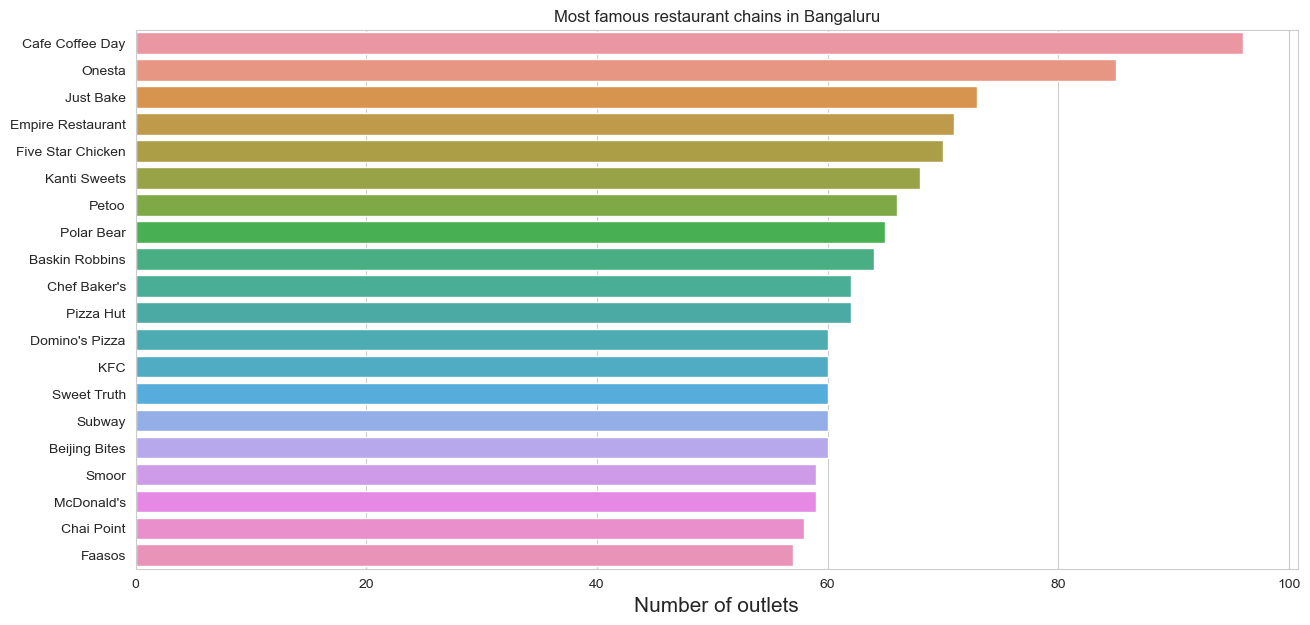

In [62]:
plt.figure(figsize=(15,7))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index)
plt.title("Most famous restaurant chains in Bangaluru")
plt.xlabel("Number of outlets",size=15)

In [63]:
locations = pd.DataFrame({"Name": df['location'].unique()})
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [64]:
locations['Name']=locations['Name'].apply(lambda x: "Bengaluru " + str(x)) 
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)

In [65]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bengaluru","")[1:])
locations.head()

Name                            geo_loc
0        Banashankari  (12.965283249999999, 77.59445195)
1        Basavanagudi           (12.9417261, 77.5755021)
2         Mysore Road           (12.9466619, 77.5300896)
3           Jayanagar           (12.9292731, 77.5824229)
4  Kumaraswamy Layout           (12.9081487, 77.5553179)

Construtcing a basemap function

In [66]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location = default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [67]:
### Getting the restaurant count with their name and the locations

Rest_locations = pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.columns = ['Name', 'count']
Rest_locations = Rest_locations.merge(locations,on='Name', how="left").dropna()
Rest_locations

Name  count                                  geo_loc
0                     BTM   3873  (12.911275849999999, 77.60456543431182)
1   Koramangala 5th Block   2296                 (12.9348429, 77.6189768)
2                     HSR   1993                 (12.9116225, 77.6388622)
3             Indiranagar   1800                 (12.9732913, 77.6404672)
4                JP Nagar   1710                 (12.9072515, 77.5782713)
..                    ...    ...                                      ...
87              Yelahanka      4                 (13.1006982, 77.5963454)
88         West Bangalore      3                 (12.9848519, 77.5400626)
89   Rajarajeshwari Nagar      2                 (12.9274413, 77.5155224)
90             Nagarbhavi      1         (12.95961755, 77.51126721318181)
91                 Peenya      1                 (13.0329419, 77.5273253)

[87 rows x 3 columns]

In [68]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),radius=15).add_to(basemap)
basemap

- We can observe that restaurants tend to concentrate in central bangalore area.

- As we move away from central,then there is lowering of cluttering of restaurants.

- This can be vital information for the restaurant owner and entrepreneurs

### Heat Map of South Indian Restaurants

In [69]:
def produce_data(col,name):
    data= pd.DataFrame(df[df[col]==name].groupby(['location'],as_index=False)['address'].agg('count'))
    data.columns=['Name','count']
    print(data.head())
    data=data.merge(locations,on="Name",how='left').dropna()
    data['lan'],data['lon']=zip(*data['geo_loc'].values)
    return data.drop(['geo_loc'],axis=1)

In [70]:
food=produce_data('cuisines','South Indian')
basemap=generateBaseMap()
HeatMap(food[['lan','lon','count']].values.tolist(),radius=15).add_to(basemap)
basemap

                Name  count
0                BTM     59
1       Banashankari     55
2          Banaswadi     27
3  Bannerghatta Road     20
4       Basavanagudi     84


### Heat Map of North Indian Restaurants


In [71]:
food=produce_data('cuisines','North Indian')
basemap=generateBaseMap()
HeatMap(food[['lan','lon','count']].values.tolist(),radius=15).add_to(basemap)
basemap

                Name  count
0                BTM    241
1       Banashankari     27
2          Banaswadi      5
3  Bannerghatta Road     57
4       Basavanagudi     16


- It is Interesting to see that there is cluster of North Indian Restaurants in South Bangalore area !

- This may indicate that these areas are more populated by North Indians.

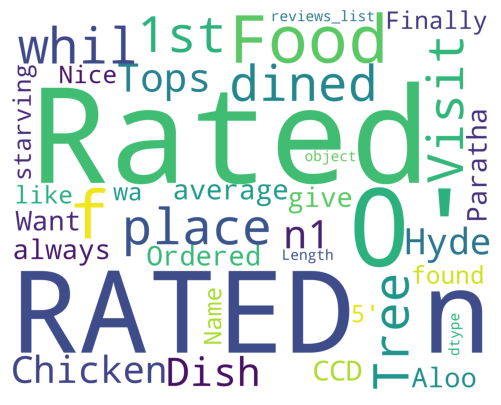

In [72]:
stopwords = (stopwords.words('english'))
wordcloud = WordCloud(width=2500, height=2000, max_words=100,
                      background_color='White',stopwords= stopwords, 
                      normalize_plurals=True).generate(str(df['reviews_list'].sample(100, 
                     random_state=0)))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()